In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec

In [2]:
num_task=5
epochs=250

def get_mean_acc(acc,epochs):
    num_task=len(acc)
    temp=np.zeros((num_task,len(acc[0])))
    for t,v in acc.items():
        temp[t,range(t * epochs, num_task * epochs)]=v
        if t<num_task-1:
            temp[t+1,:]=temp[:t+1,:].mean(0)
    return temp.mean(0)

def get_mean_acc_on_iterations(acc_list):
    acc = {}
    for i in acc_list[0].keys():
        acc[i] = np.zeros(len(acc_list[0][i]))
    for t in range(len(acc_list)):
        for i in acc_list[0].keys():
            acc[i] += np.array(acc_list[t][i]) / len(acc_list)
    return acc

## Sketch EWC Accuracy

In [3]:
acc_ewc_list = []
acc_block_diagonal_ewc_list = []
acc_sketch_ewc_list = []
acc_rank_1_ewc_list = []
acc_low_rank_ewc_list = []
acc_full_ewc_list = []
for i in range(5):
    path_ewc = './toy_example/toy_example_ewc_id_%d.pkl'%(i)
    with open(path_ewc, 'rb') as f:
        acc_ewc, acc_block_diagonal_ewc, acc_sketch_ewc, acc_rank_1_ewc, acc_low_rank_ewc, acc_full_ewc = pickle.load(f)
        acc_ewc_list.append(acc_ewc)
        acc_block_diagonal_ewc_list.append(acc_block_diagonal_ewc)
        acc_sketch_ewc_list.append(acc_sketch_ewc)
        acc_rank_1_ewc_list.append(acc_rank_1_ewc)
        acc_low_rank_ewc_list.append(acc_low_rank_ewc)
        acc_full_ewc_list.append(acc_full_ewc)

In [4]:
acc_ewc = get_mean_acc_on_iterations(acc_ewc_list)
acc_block_diagonal_ewc = get_mean_acc_on_iterations(acc_block_diagonal_ewc_list)
acc_sketch_ewc = get_mean_acc_on_iterations(acc_sketch_ewc_list)
acc_rank_1_ewc = get_mean_acc_on_iterations(acc_rank_1_ewc_list)
acc_low_rank_ewc = get_mean_acc_on_iterations(acc_low_rank_ewc_list)
acc_full_ewc = get_mean_acc_on_iterations(acc_full_ewc_list)

In [5]:
acc_ewc_final = np.array([get_mean_acc(acc_ewc_list[i],epochs)[-1] for i in range(5)])
acc_block_diagonal_ewc_final = np.array([get_mean_acc(acc_block_diagonal_ewc_list[i],epochs)[-1] for i in range(5)])
acc_sketch_ewc_final = np.array([get_mean_acc(acc_sketch_ewc_list[i],epochs)[-1] for i in range(5)])
acc_rank_1_ewc_final = np.array([get_mean_acc(acc_rank_1_ewc_list[i],epochs)[-1] for i in range(5)])
acc_low_rank_ewc_final = np.array([get_mean_acc(acc_low_rank_ewc_list[i],epochs)[-1] for i in range(5)])
acc_full_ewc_final = np.array([get_mean_acc(acc_full_ewc_list[i],epochs)[-1] for i in range(5)])
print(acc_ewc_final.mean(), acc_ewc_final.std())
print(acc_block_diagonal_ewc_final.mean(), acc_block_diagonal_ewc_final.std())
print(acc_sketch_ewc_final.mean(), acc_sketch_ewc_final.std())
print(acc_rank_1_ewc_final.mean(), acc_rank_1_ewc_final.std())
print(acc_low_rank_ewc_final.mean(), acc_low_rank_ewc_final.std())
print(acc_full_ewc_final.mean(), acc_full_ewc_final.std())

0.8795999999999999 0.07336715886553055
0.7933999999999999 0.09790168537875124
0.921 0.06748259034743699
0.8320000000000001 0.12114247809913746
0.9394 0.038091206334270836
0.9574 0.05390955388426065


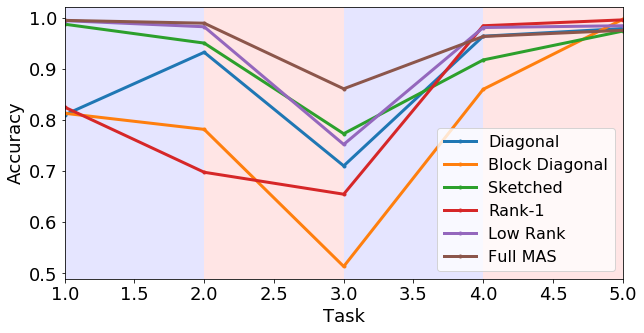

In [7]:
plt.figure(figsize=(10,5))

for t in range(1,num_task):
    if t%2:
        c='b'
    else:
        c='r'
    plt.axvspan(t, t+1, facecolor=c, alpha=0.1)
plt.plot(np.arange(5)+1,[acc_ewc[j][-1] for j in range(5)],'.-',linewidth=3)
plt.plot(np.arange(5)+1,[acc_block_diagonal_ewc[j][-1] for j in range(5)],'.-',linewidth=3)
plt.plot(np.arange(5)+1,[acc_sketch_ewc[j][-1] for j in range(5)],'.-',linewidth=3)
plt.plot(np.arange(5)+1,[acc_rank_1_ewc[j][-1] for j in range(5)],'.-',linewidth=3)
plt.plot(np.arange(5)+1,[acc_low_rank_ewc[j][-1] for j in range(5)],'.-',linewidth=3)
plt.plot(np.arange(5)+1,[acc_full_ewc[j][-1] for j in range(5)],'.-',linewidth=3)
plt.xlim(1,num_task)
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
# plt.ylim(0.7,1)
plt.locator_params(axis='x', nbins=10)
plt.legend(['Diagonal', 'Block Diagonal', 'Sketched', 'Rank-1', 'Low Rank', 'Full MAS'],fontsize=16)
plt.xlabel('Task',fontsize=18),plt.ylabel('Accuracy',fontsize=18)

# plt.savefig('figure/grid_search_sketch_ewc_task_compare_1.pdf', bbox_inches='tight')
plt.show()